# Data Import

In [1]:
pip list --outdated

Package              Version     Latest      Type
-------------------- ----------- ----------- -----
alembic              1.7.6       1.7.7       wheel
arch                 5.1.0       5.2.0       wheel
arrow                0.13.1      1.2.2       wheel
asgiref              3.4.1       3.5.0       wheel
asn1crypto           1.4.0       1.5.1       wheel
astroid              2.6.6       2.11.2      wheel
astropy              5.0.2       5.0.4       wheel
bitarray             2.3.5       2.4.1       wheel
black                19.10b0     22.3.0      wheel
category-encoders    2.3.0       2.4.0       wheel
charset-normalizer   2.0.4       2.0.12      wheel
click                8.0.4       8.1.2       wheel
comtypes             1.1.10      1.1.11      wheel
contextlib2          0.6.0.post1 21.6.0      wheel
cookiecutter         1.7.2       1.7.3       wheel
cryptography         3.4.8       36.0.2      wheel
cytoolz              0.11.0      0.11.2      sdist
daal4py              2021.5.0   

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [84]:
df = pd.read_csv('train.csv')
stck_df_test = pd.read_csv('test.csv')

In [85]:
df.head()

,Id,Closing Status,Headline1,Headline2,Headline3,Headline4,Headline5,Headline6,Headline7,Headline8,...,Headline16,Headline17,Headline18,Headline19,Headline20,Headline21,Headline22,Headline23,Headline24,Headline25
0,0,1,Milan court convicts Berlusconi of tax evasion...,Suicide bomber kills 20 in Afghan mosque,"After the biggest double dip since WW2, the UK...",Billions in Hidden Riches for Family of Chines...,Former Italian Prime Minister Silvio Berluscon...,"Through Her Sister's Eyes -- ""This seemingly m...",UN to investigate civilian deaths from US dron...,Ben Goldacre: Closed drug trials leave patient...,...,Britain rejects US request to use UK bases in ...,New York Times blocked in China over Wen Jiaba...,What Are the Odds That Israel Just Attacked Su...,Opinion poll shows 43% of French people see Is...,New York Times blocked by China after report o...,The British government opposed the establishme...,"Ashok Khemka, a bureaucrat in India, has been ...",Malala's parents overjoyed after first visit i...,"A victory for self-defence, but only a partial...",British ExxonMobil oil chief 'assassinated' in...
1,1,0,Iraq Police Training: $200 Million Wasted On P...,Pussy Riot: will Vladimir Putin regret taking ...,Syrian troops vow to 'purge' Aleppo of rebels ...,Four Iranians Sentenced to Death Over $2.3 Bln...,"Christchurch, New Zealand rebuild plans unveil...",Deadly Ebola Virus Reaches Ugandan Capital,Cat electrocuted; East Delhi goes powerless fo...,"In Israel, at least 7 people have set themselv...",...,Britain just signed a 25 year contract to let ...,"Air pollution turns Beijing into ""Greyjing""",Israeli troops kill Palestinian at checkpoint,Couple stoned to death in Mali for having sex ...,Two Journalists Freed by Syrian Rebels After W...,"Across Latin America, leaders appalled by the ...",Germany Breaks 25% Renewable Energy Barrier -...,Uruguay Considers Legalizing Marijuana to Stop...,"Beijing's Real Olympic Hero: Meet Ji Sizun, im...","Philippines birth control: Filipinos want it, ..."
2,2,0,"Al Shabaab kidnaps, interrogates new Somali mi...",The 'For Neville' email: two words that could ...,Explosion rocks Norwegian PM's office,"Speaker of The House says UK ""parliament has r...","James Murdoch knew of phone hacking, former Ne...",Shooting at Norwegian Social Democratic Youth ...,UN report claims North Korea and Iran are exch...,Greece defaults... selectively.,...,East Africa's famine: Millions of human beings...,Egypt's military rulers ban foreign election o...,Large explosion in Oslo at Prime ministers off...,"A whole block just exploded in Oslo, Norway. ...",James Murdoch Accused of Lying to Parliament,Eleven killed during mass protests in Syria\n\n,Huge explosion in downtown Oslo,Indian Government Blocks Leading File-Sharing ...,"The Bin Laden Vaccine: Yes, vaccinations are a...","Posted last week, but buried beneath the bigge..."
3,3,1,Sweden With Entitlements &amp; Health Care Sur...,Military and medical experts call on doctors t...,Syria's only casino has been shut down and a b...,"Japan is ""very sorry"" about irradiating the oc...",First mention in a Chinese newspaper of the de...,"In post-Mubarak Egypt, abductions of women hav...","Gadhafi, in letter, asks Obama to end air stri...","Tokyo Electric Power Company ""called the initi...",...,The cop who pushed Ian Tomlinson to the ground...,NHK: Radioactivity at Fukushima Daiichi No. 1-...,Ai Weiwei's detention suggests the bad old day...,75 Year old Georgian Woman shuts down Armenian...,English surgeons protest long wait times for m...,"""Academic researchers worldwide, including vet...","Julian Assange: ""WikiLeaks is the intelligence...",Sudan accuses Israel over Port Sudan air strik...,New Israeli-Palestinian peace proposal present...,International Energy Agency says peak oil happ...
4,4,0,FIFA has banned Croatian defender Josip Simuni...,Devyani arrest: India asks all US diplomats to...,Sochi Olympic critics get terrorist treatment ...,"London Bankers Expec

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690 entries, 0 to 1689
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              1690 non-null   int64 
 1   Closing Status  1690 non-null   int64 
 2   Headline1       1690 non-null   object
 3   Headline2       1690 non-null   object
 4   Headline3       1687 non-null   object
 5   Headline4       1690 non-null   object
 6   Headline5       1690 non-null   object
 7   Headline6       1690 non-null   object
 8   Headline7       1690 non-null   object
 9   Headline8       1690 non-null   object
 10  Headline9       1690 non-null   object
 11  Headline10      1690 non-null   object
 12  Headline11      1687 non-null   object
 13  Headline12      1690 non-null   object
 14  Headline13      1690 non-null   object
 15  Headline14      1690 non-null   object
 16  Headline15      1690 non-null   object
 17  Headline16      1690 non-null   object
 18  Headline

In [87]:
stck_df_test.head()

,Id,Headline1,Headline2,Headline3,Headline4,Headline5,Headline6,Headline7,Headline8,Headline9,...,Headline16,Headline17,Headline18,Headline19,Headline20,Headline21,Headline22,Headline23,Headline24,Headline25
0,0,China cyber probes show electronic warfare foc...,More pupils than expected in 'illegal schools'...,"Police sealed off a hotel in Ankara on Sunday,...","Car fires turning into a Dutch plague, 100s to...",Magnitude 5.6 / Shindo 5 earthquake shakes Iba...,Police in Colombia seize more than 8 tons of c...,Google (GOOGL.O) faces a record antitrust fine...,China waging war against ancient superstitions...,Erdoan pictured as Hitler on Turkish Embassy i...,...,An online al Qaeda magazine is calling for jih...,North Korea releases Russian yacht - detention...,Duterte vows to kill criminals and reintroduce...,"Venezuelan President decrees emergency, seizes...",Luxembourg prosecutors seek jail time for whis...,"Al Qaeda Turns to Syria, With a Plan to Challe...",Iran is arresting models who pose without head...,Scientists Seek To Bring Dead Brains Back To Life,Former CIA agent admits involvment in Nelson M...,New move to impeach Tony Blair over Iraq War g...
1,1,"b'Mosab Hassan Yousef, son of Hamas leader, be...","b""Gold Farming Comparable In $$ To India's Ent...","b""UK child protection database 'will be used t...",b'The Puppet Masters Behind Georgia President ...,b'2008 Globally the Coldest Year of the Centur...,"b""Iceland's Armed Forces Unveils Mecha-Bjrk [P...","b'Victims Of ""Nigerian Scams"" Giving Nigeria A...",b'Refugee camp in Darfur under direct attack',b'Israel claims allowing an aid ship to reach ...,...,"b""Flashback: Naked, drunk, surrounded by sex t...",b'Let\'s rewrite history : A new historical c...,"b""SHOCK! Amsterdam's Smoking Ban Doesn't Apply...",b'Pedophile attempts to assault and kidnap chi...,"b'Swiss engineers, a nuclear black market and ...",b'Russia accused of violating ceasefire deal',"b""N Korea's Kim died in 2003; replaced by look...",b'Four killed in Kashmir protests',b'Iraqi Teenage Girl Wearing Explosives Turns ...,"b'Wealthy Mexicans, terrified of soaring kidna..."
2,2,U.S. warships accompany British commercial ves...,UN calls for suspension of TTIP talks over fea...,Netanyahu: Israel will fight racism - Ethiopia...,Boko Haram stoned captive girls to death as re...,Sexting could see teenagers branded as sex off...,The lower house of Frances Parliament overwhel...,Jewish students to protest violence by speakin...,UN: More than 200 young women rescued from Bok...,Canada's Trudeau vows to cut middle-class taxe...,...,Prime Minister of Singapore shares his C++ cod...,South African universities join academic boyco...,The world needs to triple its investments in c...,TransCanada Keystone 1 Pipeline Suffered Major...,"Fertilizer, Also Suited for Bombs, Flows to IS...",Jihadists destroy proposed world heritage site...,Qatar detained German reporters investigating ...,China overtakes Mexico as top sender of immigr...,Philippines' Most Wanted Terrorist Killed by B...,Canada poised to pass anti-terror legislation ...
3,3,"400,000-year-old fossils from Spain provide ea...",Blood Lions documentary exposes controversial ...,Saudi Arabia 'planning Nato-like military alli...,Pakistan cricket captain Shahid Afridi accused...,Saudi Arabia-led coalition kills 41 civilians ...,"NSW, Australia: Anti-coal seam gas protesters ...",Belgian police hunt gunman after Brussels anti...,NASA will intentionally start a fire on a carg...,North Korea Sentences US Tourist to 15 Years i...,...,"Denmark world's happiest country, Burundi leas...",Rescuers: Female suicide bombers kill 22 at Ni...,A powerful Syrian Kurdish political party is p...,The world's first solar airport no longer pays...,More than 40 civilians killed in Yemen market ...,Canadian woman who successfully sued province ...,"FIFA admits to World Cup hosting bribes, asks ...",Brazil's ex-president Luiz Inacio Lula da Silv...,Netherlands votes to ban weapons expor

In [88]:
stck_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Id          299 non-null    int64 
 1   Headline1   299 non-null    object
 2   Headline2   299 non-null    object
 3   Headline3   299 non-null    object
 4   Headline4   299 non-null    object
 5   Headline5   299 non-null    object
 6   Headline6   299 non-null    object
 7   Headline7   299 non-null    object
 8   Headline8   299 non-null    object
 9   Headline9   299 non-null    object
 10  Headline10  299 non-null    object
 11  Headline11  299 non-null    object
 12  Headline12  299 non-null    object
 13  Headline13  299 non-null    object
 14  Headline14  299 non-null    object
 15  Headline15  299 non-null    object
 16  Headline16  299 non-null    object
 17  Headline17  299 non-null    object
 18  Headline18  299 non-null    object
 19  Headline19  299 non-null    object
 20  Headline20

## 1. Data Exploratory Analysis

In [89]:
df['Id'].describe()

count    1690.000000
mean      844.500000
std       488.005294
min         0.000000
25%       422.250000
50%       844.500000
75%      1266.750000
max      1689.000000
Name: Id, dtype: float64

In [90]:
df['Id'].isna().sum()

0

In [91]:
df["Headlines"] = df["Headline1"] + df["Headline2"] + df["Headline3"] + df["Headline4"] + df["Headline5"] + df["Headline6"] + df["Headline7"] + + df["Headline8"] + df["Headline9"] + df["Headline10"] + df["Headline11"]+ df["Headline12"]+ df["Headline13"]+ df["Headline14"]+ df["Headline15"]+ df["Headline16"]+ df["Headline17"]+ df["Headline18"]+ df["Headline19"]+ df["Headline20"]+ df["Headline21"]+ df["Headline22"]+ df["Headline23"]+ df["Headline24"]+ df["Headline25"]

In [92]:
df  = df[['Headlines', 'Closing Status']].head(10000)

In [93]:
set(df['Closing Status'].values)

{0, 1}

In [94]:
df['LabelSentiment'] = df['Closing Status'].apply(lambda x: 1 if x in [1] else 0)

In [95]:
df.head()

,Headlines,Closing Status,LabelSentiment
0,Milan court convicts Berlusconi of tax evasion...,1,1
1,Iraq Police Training: $200 Million Wasted On P...,0,0
2,"Al Shabaab kidnaps, interrogates new Somali mi...",0,0
3,Sweden With Entitlements &amp; Health Care Sur...,1,1
4,FIFA has banned Croatian defender Josip Simuni...,0,0


<AxesSubplot:>

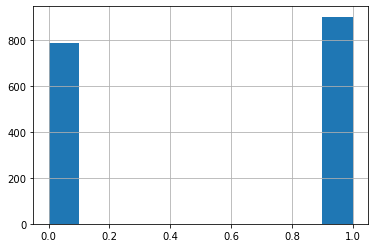

In [176]:
df['Closing Status'].hist()

### Word Count

In [97]:
df['word_count']  = df['Headlines'].apply(lambda x: len(str(x).split(" ")))
df[['Headlines','word_count']].head()

,Headlines,word_count
0,Milan court convicts Berlusconi of tax evasion...,577
1,Iraq Police Training: $200 Million Wasted On P...,488
2,"Al Shabaab kidnaps, interrogates new Somali mi...",288
3,Sweden With Entitlements &amp; Health Care Sur...,519
4,FIFA has banned Croatian defender Josip Simuni...,523


In [98]:
df.word_count.describe()

count    1690.000000
mean      420.736095
std        74.456612
min         1.000000
25%       374.000000
50%       422.000000
75%       470.000000
max       667.000000
Name: word_count, dtype: float64

<AxesSubplot:>

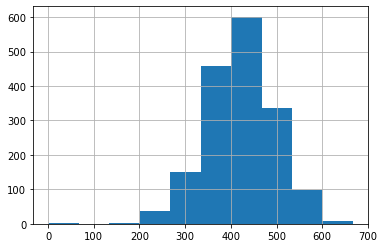

In [99]:
df['word_count'].hist()

In [100]:
all_words = ' '.join([str(i) for i in df['Headlines']]).split()

In [101]:
freq = pd.Series(all_words).value_counts()
freq.sort_values(ascending=False)[0:15]

the     22987
to      21823
of      19166
in      18466
a       11921
and     10497
for      7690
on       6406
is       5202
by       4224
-        4220
that     4061
has      3869
with     3573
from     3544
dtype: int64

In [102]:
freq.index[0:15]

Index(['the', 'to', 'of', 'in', 'a', 'and', 'for', 'on', 'is', 'by', '-',
       'that', 'has', 'with', 'from'],
      dtype='object')

In [103]:
stck_df_test['Closing Status'] = ''

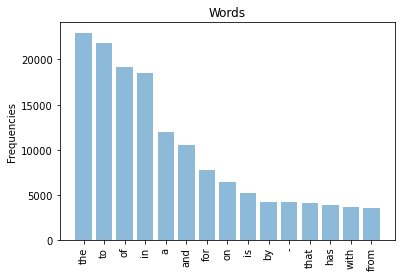

In [104]:
x_labels = freq.index[0:15]
values = freq[:15]
plt.bar(x_labels, values, align='center', alpha=0.5)
plt.xticks(x_labels)
plt.ylabel('Frequencies')
plt.title('Words')
plt.xticks(rotation=90)
plt.show()

In [105]:
df.word_count.describe()

count    1690.000000
mean      420.736095
std        74.456612
min         1.000000
25%       374.000000
50%       422.000000
75%       470.000000
max       667.000000
Name: word_count, dtype: float64

# 2. Train - Test split

In [106]:
X_train, X_test, y_train, y_test = train_test_split(df['Headlines'], df['LabelSentiment'], test_size=0.20, random_state=4)

In [107]:
len(X_train), len(X_test), len(y_train), len(y_test)

(1352, 338, 1352, 338)

## 3. Data Preprocessing 

In [108]:
stop = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')
lemma = WordNetLemmatizer()

In [109]:
X_train_ = X_train.copy()

In [110]:
from tqdm import tqdm
def clean(text_list):
    
    updates = []
    
    for j in tqdm(text_list):
        
        text = j
        
        #LOWERCASE TEXT
        #text = text.lower()
        
        #REMOVE NUMERICAL DATA and PUNCTUATION
        text = re.sub("[^a-zA-Z]"," ", str(text) )
        
        #REMOVE STOPWORDS
        text = " ".join([word for word in text.split() if word not in stop])
        
        #Lemmatize
        text = " ".join(lemma.lemmatize(word) for word in text.split())
            
        updates.append(text)
        
    return updates

In [111]:
x_train_clean = clean(X_train)

100%|██████████| 1352/1352 [00:02<00:00, 460.19it/s]


In [112]:
X_test_clean = clean(X_test)

100%|██████████| 338/338 [00:00<00:00, 662.05it/s]


In [113]:
y_train = y_train.to_numpy()

In [114]:
y_test = y_test.to_numpy()

## 4. Feature Engineering


In [115]:
import gensim.downloader

In [116]:
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [117]:
w2v = gensim.downloader.load('word2vec-google-news-300')

In [118]:
def corpus2vec(corpus):
    corpus_vec = []
    for document in corpus:
        #get word vectors for each document
        doc_vectors = []
        for word in document.split():
            if word in w2v.index_to_key:
                doc_vectors.append(w2v.word_vec(word))         
        corpus_vec.append(doc_vectors)
    return corpus_vec

In [119]:
x_train_vec = corpus2vec(x_train_clean)

C:\Users\carlo\AppData\Local\Temp\ipykernel_77356\1283255324.py:8: DeprecationWarning: Call to deprecated `word_vec` (Use get_vector instead).
  doc_vectors.append(w2v.word_vec(word))


In [121]:
x_test_vec = corpus2vec(X_test_clean)

C:\Users\carlo\AppData\Local\Temp\ipykernel_77356\1283255324.py:8: DeprecationWarning: Call to deprecated `word_vec` (Use get_vector instead).
  doc_vectors.append(w2v.word_vec(word))


### TfidfVectorizer

In [122]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [123]:
tfidf = TfidfVectorizer(max_df=0.8, ngram_range=(1,2))

In [124]:
X = tfidf.fit_transform(x_train_clean).toarray()

In [125]:
X.shape

(1352, 352294)

In [126]:
y = y_train

In [127]:
x_test = tfidf.transform(X_test_clean).toarray()

In [128]:
y_test = y_test

# 5/6. Classification Model and Evaluations

Naive Bayes

In [129]:
from sklearn.naive_bayes import GaussianNB

In [130]:
nb = GaussianNB()

In [131]:
nb.fit(X, y)

GaussianNB()

In [132]:
nb_pred = nb.predict(x_test)

In [133]:
from sklearn.metrics import classification_report

In [134]:
print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.47      0.30      0.36       158
           1       0.53      0.71      0.61       180

    accuracy                           0.51       338
   macro avg       0.50      0.50      0.49       338
weighted avg       0.50      0.51      0.49       338



In [175]:
print(nb_pred)

[0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1
 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1
 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 0 1 1 1 0 0 1 0 1 1
 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1
 0 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0
 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 1
 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0
 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 1
 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1
 1 0 0 1 1]


#### Logistic Regression

In [135]:
from sklearn.linear_model import LogisticRegression

In [136]:
lr = LogisticRegression(random_state=0)

In [137]:
lr.fit(X,y)

LogisticRegression(random_state=0)

In [138]:
lr.classes_

array([0, 1], dtype=int64)

In [139]:
lr.coef_

array([[-0.02136423, -0.02136423, -0.05991764, ..., -0.02096409,
         0.01673409,  0.01673409]])

In [140]:
lr.intercept_

array([0.14901326])

In [141]:
lr_pred = lr.predict(x_test)

In [142]:
lr_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [143]:
lr.predict_proba(x_test)

array([[0.4936126 , 0.5063874 ],
       [0.46631656, 0.53368344],
       [0.46524654, 0.53475346],
       [0.46671862, 0.53328138],
       [0.52145654, 0.47854346],
       [0.47847198, 0.52152802],
       [0.49272956, 0.50727044],
       [0.44959646, 0.55040354],
       [0.50206552, 0.49793448],
       [0.43922129, 0.56077871],
       [0.46887603, 0.53112397],
       [0.44819782, 0.55180218],
       [0.4637023 , 0.5362977 ],
       [0.47035588, 0.52964412],
       [0.45218748, 0.54781252],
       [0.48397647, 0.51602353],
       [0.45378366, 0.54621634],
       [0.48367419, 0.51632581],
       [0.43131474, 0.56868526],
       [0.42417956, 0.57582044],
       [0.51363281, 0.48636719],
       [0.46357296, 0.53642704],
       [0.46007611, 0.53992389],
       [0.44925331, 0.55074669],
       [0.44916979, 0.55083021],
       [0.48089249, 0.51910751],
       [0.48766329, 0.51233671],
       [0.44331006, 0.55668994],
       [0.48321569, 0.51678431],
       [0.43106551, 0.56893449],
       [0.

In [144]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.20      0.03      0.04       158
           1       0.52      0.91      0.66       180

    accuracy                           0.50       338
   macro avg       0.36      0.47      0.35       338
weighted avg       0.37      0.50      0.37       338



In [174]:
print(lr_pred)

[1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 0 1]


#### Multilayer Perceptron - ANN

In [145]:
from sklearn.neural_network import MLPClassifier

In [146]:
mlp = MLPClassifier(solver='adam', hidden_layer_sizes=(2,2), activation='logistic', random_state=1)

In [147]:
mlp.fit(X,y)

C:\Users\carlo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(2, 2), random_state=1)

In [148]:
mlp_pred = mlp.predict(x_test)

In [149]:
print(classification_report(y_test, mlp_pred))

              precision    recall  f1-score   support

           0       0.46      0.23      0.31       158
           1       0.53      0.76      0.62       180

    accuracy                           0.51       338
   macro avg       0.49      0.49      0.47       338
weighted avg       0.50      0.51      0.48       338



In [173]:
print(mlp_pred)

[0 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1
 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1
 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1
 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0
 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 0 1 0 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1
 1 1 1 0 1]


#### Model Initiation and Train (LSTM)

In [150]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)
tf.data.experimental.enable_debug_mode()
tf.random.set_seed(221)
from keras.models import Model, Input
from keras.layers import LSTM, Dense, TimeDistributed, Bidirectional, Masking
from tensorflow.keras import layers
from keras.preprocessing.sequence import pad_sequences

In [151]:
train_len = []
for i in x_train_vec:
    train_len.append(len(i))
max(train_len)

448

In [152]:
X_pad = pad_sequences(maxlen=48,sequences=x_train_vec, padding="post", dtype='float64')

In [153]:
X = tf.convert_to_tensor(X_pad, dtype='float32')

In [158]:
'''model input in the shape(number of words per doc, word embedding size)'''
input_ = Input(shape=(48,300))

'''mask layer to avoid model from considering padding vectors'''
mask_layer = Masking(mask_value=0)
mask = mask_layer(input_)

'''BiLSTM layer'''

lstm = Bidirectional(LSTM(units=4))(mask)

'''activation layer'''
act = Dense(2, activation='sigmoid')(lstm)

'''model input and output'''
model = Model(input_, act)

'''model loss function and evaluation metrics'''
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["binary_accuracy"])
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 48, 300)]         0         
                                                                 
 masking_2 (Masking)         (None, 48, 300)           0         
                                                                 
 bidirectional_2 (Bidirectio  (None, 8)                9760      
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 2)                 18        
                                                                 
Total params: 9,778
Trainable params: 9,778
Non-trainable params: 0
_________________________________________________________________


In [159]:
X.shape

TensorShape([1352, 48, 300])

In [160]:
y = tf.one_hot(y_train, depth=2)

In [161]:
history = model.fit(X, y, batch_size=16, epochs=10, verbose=1, validation_split=0.20)

Epoch 1/10
68/68 [==============================] - 17s 249ms/step - loss: 0.6938 - binary_accuracy: 0.5079 - val_loss: 0.6901 - val_binary_accuracy: 0.5055
Epoch 2/10
68/68 [==============================] - 20s 294ms/step - loss: 0.6862 - binary_accuracy: 0.5402 - val_loss: 0.6909 - val_binary_accuracy: 0.5166
Epoch 3/10
68/68 [==============================] - 20s 287ms/step - loss: 0.6788 - binary_accuracy: 0.5675 - val_loss: 0.6936 - val_binary_accuracy: 0.5111
Epoch 4/10
68/68 [==============================] - 20s 289ms/step - loss: 0.6645 - binary_accuracy: 0.6073 - val_loss: 0.7013 - val_binary_accuracy: 0.5351
Epoch 5/10
68/68 [==============================] - 19s 279ms/step - loss: 0.6378 - binary_accuracy: 0.6711 - val_loss: 0.7260 - val_binary_accuracy: 0.5314
Epoch 6/10
68/68 [==============================] - 19s 277ms/step - loss: 0.5985 - binary_accuracy: 0.7137 - val_loss: 0.7508 - val_binary_accuracy: 0.4649
Epoch 7/10
68/68 [==============================] - 19s 28

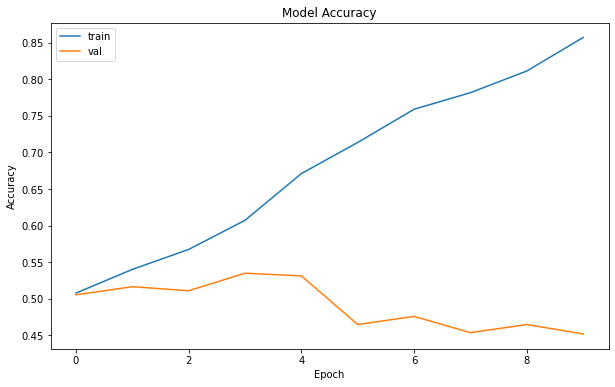

In [162]:
import matplotlib.pyplot as plt
plt.figure(figsize =(10, 6))
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [163]:
X_test_pad = pad_sequences(maxlen=48,sequences=x_test_vec, padding="post", dtype='float64')

In [164]:
x_test = tf.convert_to_tensor(X_test_pad, dtype='float32')

In [165]:
x_test.shape

TensorShape([338, 48, 300])

In [166]:
pred_y = model.predict(x_test)

In [167]:
pred_y

array([[0.33829698, 0.70946836],
       [0.18149173, 0.7902884 ],
       [0.45374933, 0.4739877 ],
       [0.46432036, 0.5955602 ],
       [0.68659514, 0.30043387],
       [0.33077854, 0.67385566],
       [0.48450565, 0.6513485 ],
       [0.45137233, 0.5191665 ],
       [0.1467573 , 0.8510165 ],
       [0.11525074, 0.87091184],
       [0.22668362, 0.7376158 ],
       [0.7592491 , 0.17985678],
       [0.3219792 , 0.6402718 ],
       [0.6756458 , 0.2789849 ],
       [0.21411297, 0.7701596 ],
       [0.5400574 , 0.41954997],
       [0.7753148 , 0.25697112],
       [0.5991624 , 0.3639792 ],
       [0.47139543, 0.5920277 ],
       [0.1342394 , 0.794732  ],
       [0.6876471 , 0.37149066],
       [0.06395659, 0.9270078 ],
       [0.7567892 , 0.26004162],
       [0.3138578 , 0.6378108 ],
       [0.29005042, 0.6694764 ],
       [0.22319558, 0.64972025],
       [0.58632666, 0.4558342 ],
       [0.06308231, 0.93546283],
       [0.06451488, 0.93346786],
       [0.29544243, 0.7443955 ],
       [0.

In [168]:
y_pred = []
for doc in pred_y:
    y_pred.append(np.argmax(doc, axis=None, out=None))

In [169]:
y_pred[0:10]

[1, 1, 1, 1, 0, 1, 1, 1, 1, 1]

In [170]:
y_test[0:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0], dtype=int64)

In [171]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.48      0.34      0.39       158
           1       0.54      0.68      0.60       180

    accuracy                           0.52       338
   macro avg       0.51      0.51      0.50       338
weighted avg       0.51      0.52      0.50       338



In [172]:
print(y_pred)

[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 